In [1]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
logs = glob.glob("log_42/*.log")
logs = sorted(logs)
summery42 = glob.glob("log_42/*sum*.csv")
summery77 = glob.glob("log_77/*sum*.csv")
len(summery77)

6

results for seed 42
****************************************************************************************************
log_42/volo_d4_448_summary.csv


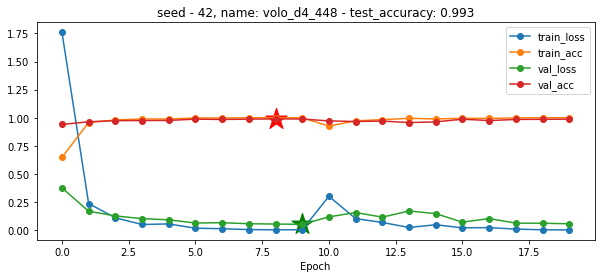

****************************************************************************************************
log_42/convnext_base_summary.csv


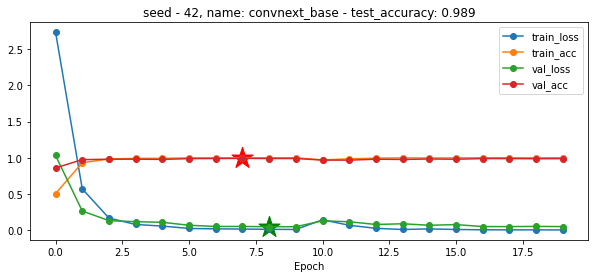

****************************************************************************************************
log_42/swin_base_patch4_window12_384_summary.csv


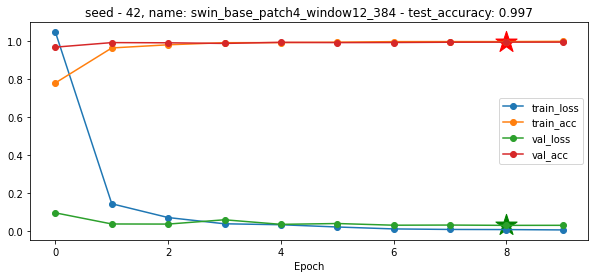

****************************************************************************************************
log_42/swin_large_patch4_window12_384_summary.csv


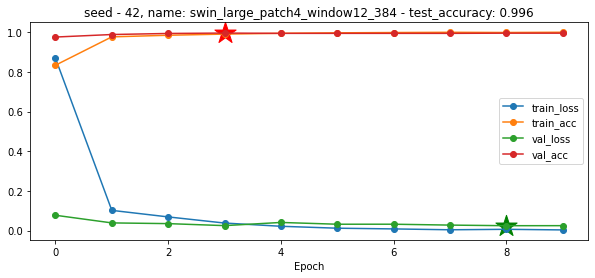

****************************************************************************************************
log_42/swinv2_large_window12to24_192to384_22kft1k_summary.csv


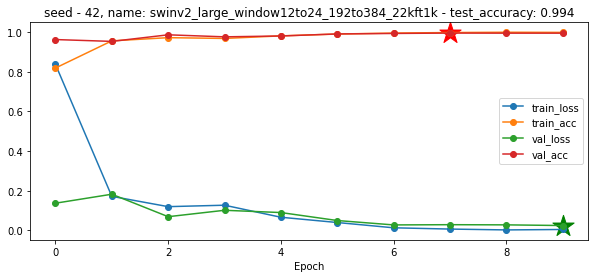

****************************************************************************************************
log_42/tf_efficientnet_b5_ns_summary.csv


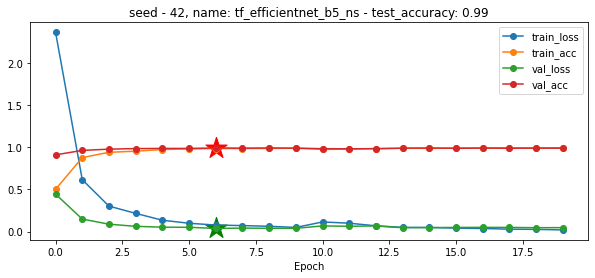

****************************************************************************************************
results for seed 77
****************************************************************************************************
log_77/swin_base_patch4_window12_384_summary.csv


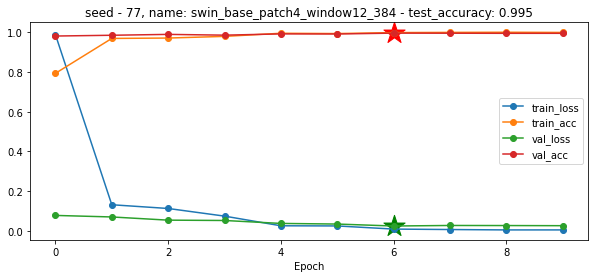

****************************************************************************************************
log_77/swin_large_patch4_window12_384_summary.csv


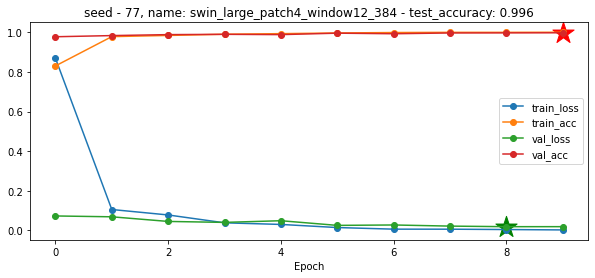

****************************************************************************************************
log_77/swinv2_large_window12to24_192to384_22kft1k_summary.csv


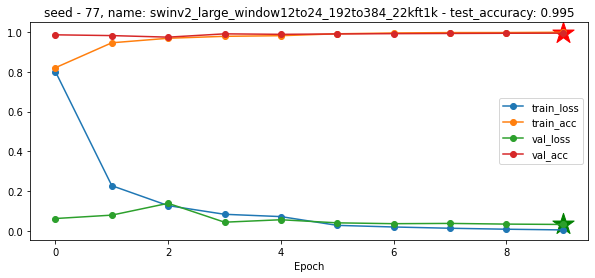

****************************************************************************************************
log_77/volo_d4_448_summary.csv


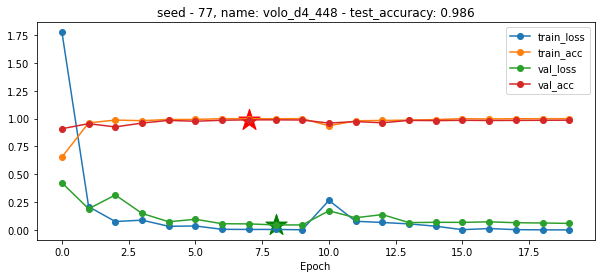

****************************************************************************************************
log_77/convnext_base_summary.csv


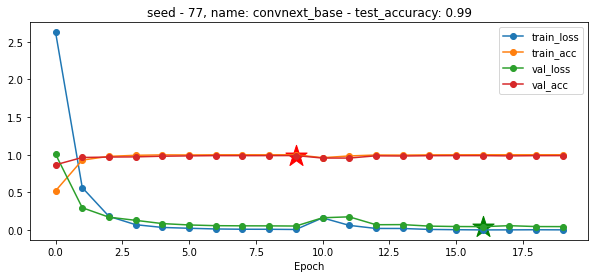

****************************************************************************************************
log_77/tf_efficientnet_b5_ns_summary.csv


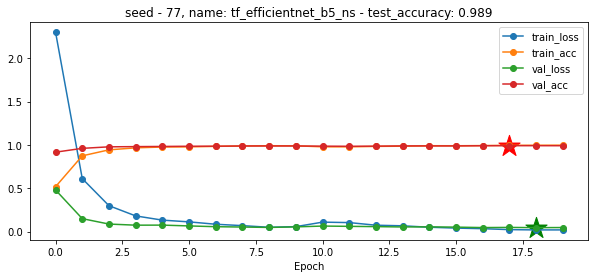

****************************************************************************************************


In [12]:
models = {}
for summery in [summery42,summery77]:
    print(f"results for seed {summery[0][4:6]}")
    print('*'*100)
    for i in range(len(summery)):
        print(summery[i])
        fig, axes = plt.subplots(1, 1,figsize=(10,4))
        df = pd.read_csv(summery[i]).set_index("Epoch").drop("time",1)
        name = summery[i].split("_summary")[0]
        with open(name+".log","r") as f:
            data = f.readlines()
            test_accuracy = data[-1].split()[-1]
        df.plot(marker='o',ax=axes)
        index = np.argmin(df.val_loss)
        axes.scatter(index,np.min(df.val_loss),marker='*',s=500, label='best val loss',c='green')
        axes.scatter(np.argmax(df.val_acc),np.max(df.val_acc),marker='*',s=500, label='best accuracy',c='red')
        t = name.replace("log_","seed - ").replace("/",", name: ")
        axes.set_title(f"{t} - test_accuracy: {round(float(test_accuracy),3)}")
        plt.show()
        # axes.legend(['train loss','train accuracy', 'val loss','val accuracy','best val loss','best accuracy'])
        # axes.set_ylim([0,1.1])
        # name = name.replace("log_","seed - ").replace("/",", name: ")
        # models[name] = {}
        # models[name]['test accuracy'] = float(test_accuracy[:-5])
        # models[name]['val accuracy'] = np.max(df.val_acc)
        # plt.show()
        print('*'*100)

results for seed 42
****************************************************************************************************


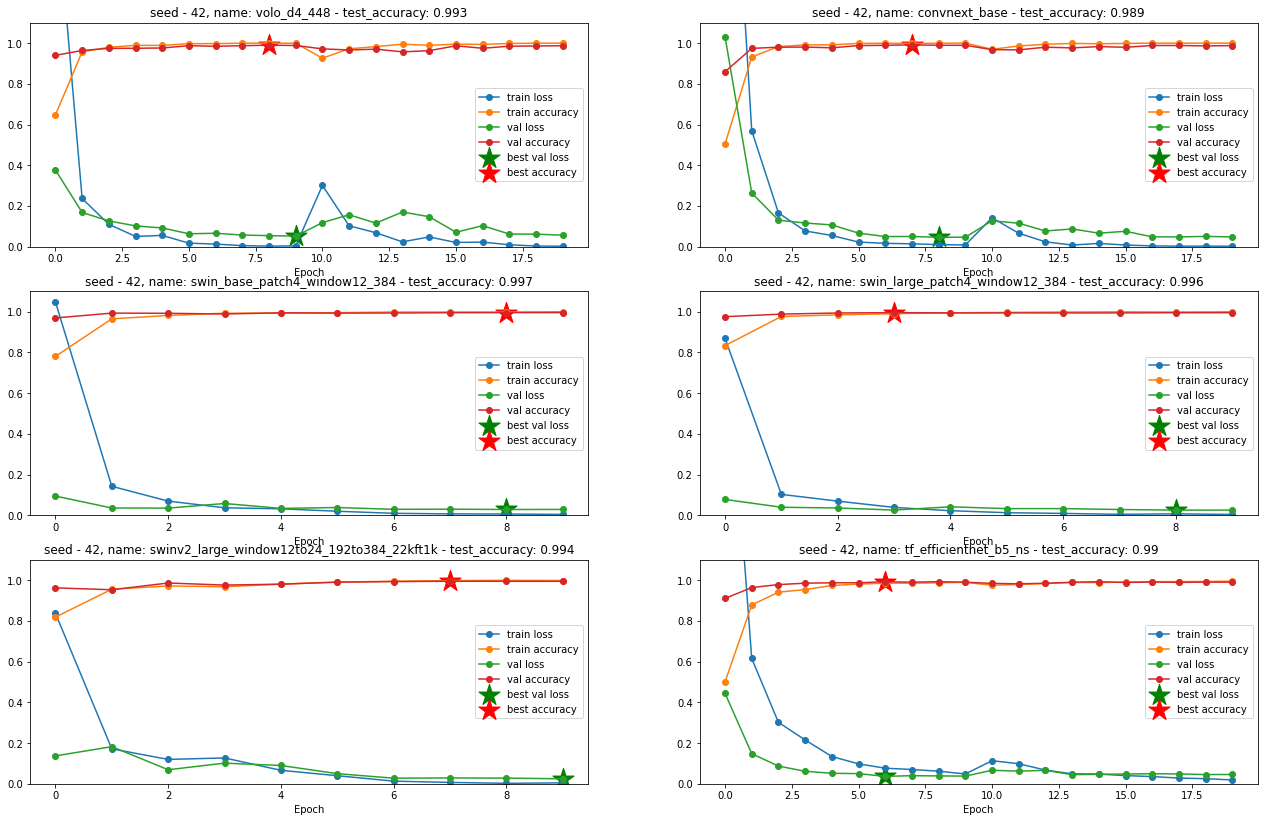

****************************************************************************************************
results for seed 77
****************************************************************************************************


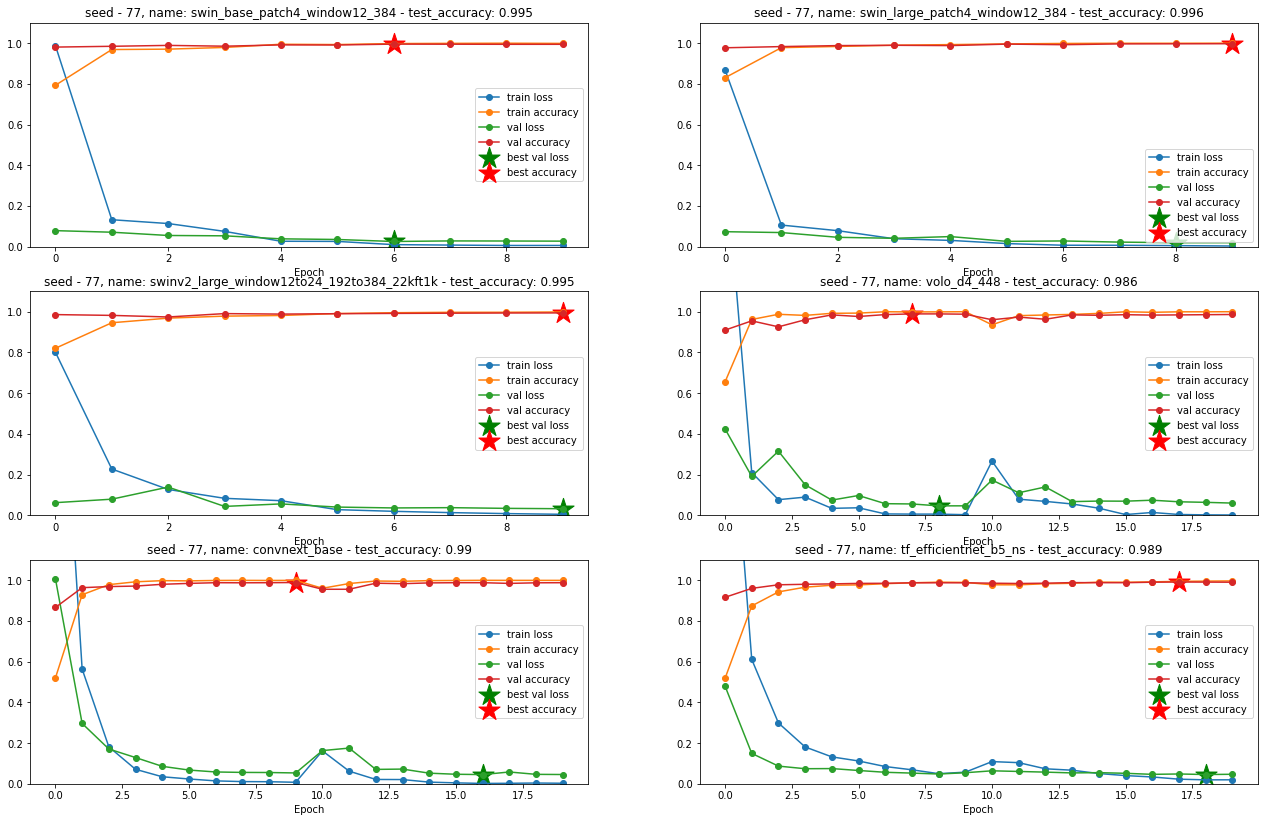

****************************************************************************************************


In [15]:
models = {}
for summery in [summery42,summery77]:
    print(f"results for seed {summery[0][4:6]}")
    print('*'*100)
    fig, axes = plt.subplots(3, 2,figsize=(22,14))
    for i in range(len(summery)):
        df = pd.read_csv(summery[i]).set_index("Epoch").drop("time",1)
        name = summery[i].split("_summary")[0]
        with open(name+".log","r") as f:
            data = f.readlines()
            test_accuracy = data[-1].split()[-1]
        df.plot(marker='o',ax=axes[i//2,i%2])
        index = np.argmin(df.val_loss)
        axes[i//2,i%2].scatter(index,np.min(df.val_loss),marker='*',s=500, label='best val loss',c='green')
        axes[i//2,i%2].scatter(np.argmax(df.val_acc),np.max(df.val_acc),marker='*',s=500, label='best accuracy',c='red')
        t = name.replace("log_","seed - ").replace("/",", name: ")
        axes[i//2,i%2].set_title(f"{t} - test_accuracy: {round(float(test_accuracy),3)}")
        axes[i//2,i%2].legend(['train loss','train accuracy', 'val loss','val accuracy','best val loss','best accuracy'])
        axes[i//2,i%2].set_ylim([0,1.1])
        name = name.replace("log_","seed - ").replace("/",", name: ")
        models[name] = {}
        models[name]['test accuracy'] = float(test_accuracy[:-5])
        models[name]['val accuracy'] = np.max(df.val_acc)
    plt.show()
    print('*'*100)

In [16]:
for m in models:
    print(f"{m} - val accuracy: {models[m]['val accuracy']}, test accuracy: {models[m]['test accuracy']} ")

seed - 42, name: volo_d4_448 - val accuracy: 0.9897410845139228, test accuracy: 0.992675 
seed - 42, name: convnext_base - val accuracy: 0.9912066438690766, test accuracy: 0.988769 
seed - 42, name: swin_base_patch4_window12_384 - val accuracy: 0.9956033219345384, test accuracy: 0.99707 
seed - 42, name: swin_large_patch4_window12_384 - val accuracy: 0.9956033219345384, test accuracy: 0.995605 
seed - 42, name: swinv2_large_window12to24_192to384_22kft1k - val accuracy: 0.9956033219345384, test accuracy: 0.9941 
seed - 42, name: tf_efficientnet_b5_ns - val accuracy: 0.9931607230092818, test accuracy: 0.9902 
seed - 77, name: swin_base_patch4_window12_384 - val accuracy: 0.9951124144672532, test accuracy: 0.99511 
seed - 77, name: swin_large_patch4_window12_384 - val accuracy: 0.997067448680352, test accuracy: 0.995605 
seed - 77, name: swinv2_large_window12to24_192to384_22kft1k - val accuracy: 0.9941348973607038, test accuracy: 0.994628 
seed - 77, name: volo_d4_448 - val accuracy: 0.98

In [69]:
df = pd.DataFrame(models).T.sort_values("test accuracy")
df.index = [row.split(" ")[4] for row in df.index]

In [70]:
df = df.reset_index().drop_duplicates("index").set_index('index')
df

,test accuracy,val accuracy
index,,
volo_d4_448,0.986300,0.989247
convnext_base,0.988769,0.991207
tf_efficientnet_b5_ns,0.989250,0.991691
swinv2_large_window12to24_192to384_22kft1k,0.994100,0.995603
swin_base_patch4_window12_384,0.995110,0.995112
swin_large_patch4_window12_384,0.995605,0.995603


Text(0.5, 1.0, 'val/test score')

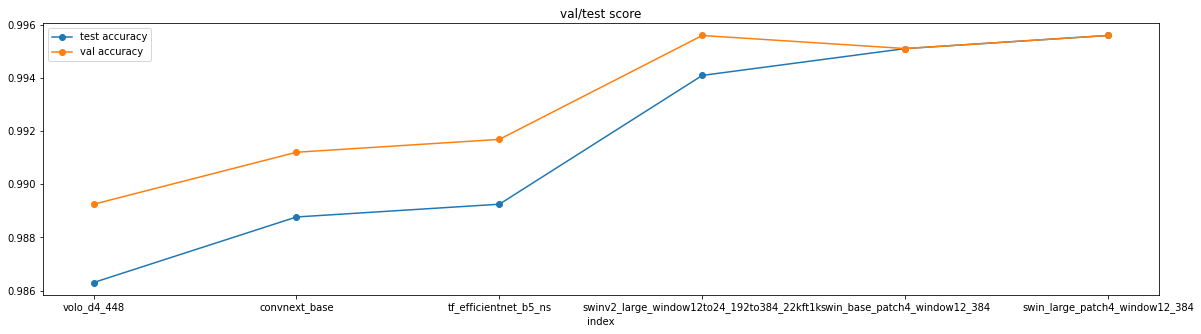

In [83]:
df.plot(figsize=[20,5],marker='o')
plt.title("val/test score")

ensemble test accuracy score 0.99755859375

show false classification


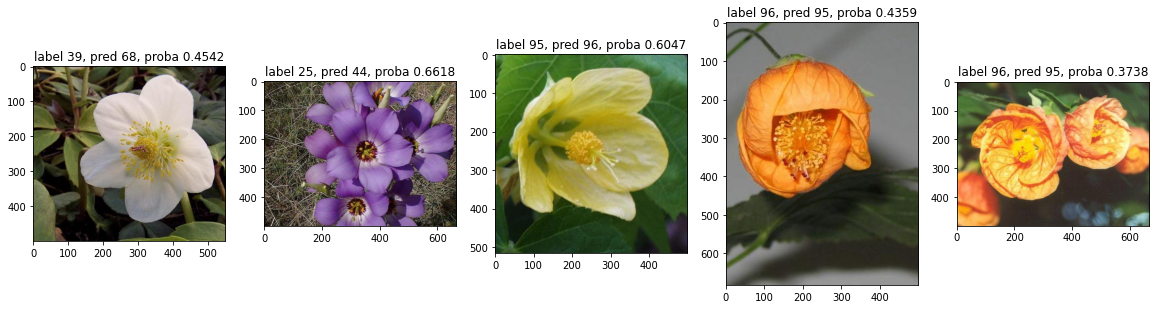

In [20]:
w = [0.2,1,1,1,0.5,0.5]
w = np.array(w)/sum(w)
probs = [row.replace("_summary","_test_probs") for row in summery42]
probs = sorted(probs)
df = [pd.read_csv(p) for p in probs]
ensemble_preds = []
for i,row in enumerate(df):
    ensemble_preds.append(row.values*w[i])
ensemble_preds2 = np.array(ensemble_preds).mean(0).argmax(1)
ensemble_proba = np.array(ensemble_preds).sum(0).max(1)
df = pd.read_csv("log_42/volo_d4_448_test.csv")
df['pred'] = ensemble_preds2
df['pred_proba'] = ensemble_proba
score42 = accuracy_score(df['class'],df['pred'])
print(f"ensemble test accuracy score {score42}")
print()
print("show false classification")
plt.figure(figsize=[20,20])
for i,row in enumerate(df[df['class']!=df['pred']].values):
    plt.subplot(1,len(df[df['class']!=df['pred']].values),i+1)
    plt.imshow(plt.imread(row[0]))
    plt.title(f"label {row[1]}, pred {row[2]}, proba {round(row[3],4)}")
plt.show()

ensemble test accuracy score 0.9970703125 for seed 77

show false classification


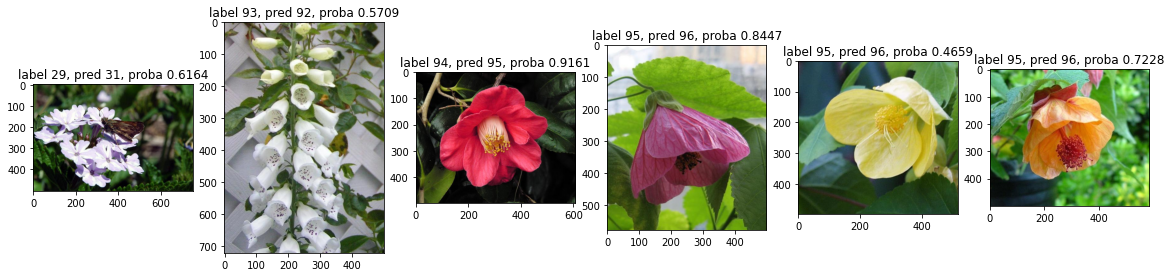

In [24]:
w = [0.2,2,1,1,0.2,0.2]
w = np.array(w)/sum(w)
probs = [row.replace("_summary","_test_probs") for row in summery77]
probs = sorted(probs)
df = [pd.read_csv(p) for p in probs]
ensemble_preds = []
for i,row in enumerate(df):
    ensemble_preds.append(row.values*w[i])
ensemble_preds2 = np.array(ensemble_preds).mean(0).argmax(1)
ensemble_proba = np.array(ensemble_preds).sum(0).max(1)
df = pd.read_csv("log_77/volo_d4_448_test.csv")
df['pred'] = ensemble_preds2
df['pred_proba'] = ensemble_proba
score77 = accuracy_score(df['class'],df['pred'])
print(f"ensemble test accuracy score {score77} for seed 77")
print()
print("show false classification")
fig = plt.figure(figsize=[20,20])
for i,row in enumerate(df[df['class']!=df['pred']].values):
    plt.subplot(1,len(df[df['class']!=df['pred']].values),i+1)
    plt.imshow(plt.imread(row[0]))
    plt.title(f"label {row[1]}, pred {row[2]}, proba {round(row[3],4)}")
plt.show()

In [25]:
print(f"Avg score for seed 77 and seed 42 - {score77/2.0+score42/2.0}")

Avg score for seed 77 and seed 42 - 0.997314453125
